# Task 1:

In [2]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data

from tqdm import tqdm_notebook

mnist = input_data.read_data_sets("data/fashion", one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [ ]:

# parameters
learningRate = 0.05
adamLearningRate = 0.005
iterations = 10000

# 1. Define Variables and Placeholders
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,10])
# 2. Define the model
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
init = tf.global_variables_initializer()

X = X / 255.0 - 0.5
# XX = tf.reshape(X,[-1,784])
Y_ = tf.nn.softmax(tf.add(tf.matmul(X, W), b))

# 3. Define the loss function  
cross_entropy = -tf.reduce_sum(Y*tf.log(Y_))
# cross_entropy = tf.train.cross_entropy(Y, Y_)

# 4. Define the accuracy 
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

# 5. Define an optimizer
optimizer = tf.train.GradientDescentOptimizer(learningRate)
# optimizer = tf.train.AdamOptimizer(0.000001) #Errors TODO
train_step = optimizer.minimize(cross_entropy)


BATCH_SIZE = 100
print("The number of traninig examples are: " + str(mnist.train.num_examples))

with tf.Session() as sess:

    # initialize
    sess.run(init)
    for i in range(iterations): ##Is it meaningful
        #load batch of images and correct answers
        batch_X, batch_Y = mnist.train.next_batch(BATCH_SIZE)
        #print(batch_Y.dtype) #dtype is 64!!
        train_data={X: batch_X, Y: batch_Y}

        #train
        sess.run(train_step, feed_dict=train_data)

        if i%100==0:
            a,c = sess.run([accuracy,cross_entropy], feed_dict=train_data)
            print("val accuracy is " + str(a))
            print("val cost function is " + str(c))

    
    print("Test results:")
    test_data = {X:mnist.test.images, 
                 Y:mnist.test.labels}
    a,c = sess.run([accuracy,cross_entropy],feed_dict=test_data)
    print("test accuracy is " + str(a))
    print("test cost function is " + str(c))
    
# # def training_step(i, update_test_data, update_train_data):

# #     print "\r", i,
# #     ####### actual learning 
# #     # reading batches of 100 images with 100 labels
# #     batch_X, batch_Y = mnist.train.next_batch(100)
# #     # the backpropagation training step
# #     sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y})
    
#     ####### evaluating model performance for printing purposes
#     # evaluation used to later visualize how well you did at a particular time in the training
#     train_a = []
#     train_c = []
#     test_a = []
#     test_c = []
#     if update_train_data:
#         a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y})
#         train_a.append(a)
#         train_c.append(c)

#     if update_test_data:
#         a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels})
#         test_a.append(a)
#         test_c.append(c)

    
#     return (train_a, train_c, test_a, test_c)


# # 6. Train and test the model, store the accuracy and loss per iteration

# train_a = []
# train_c = []
# test_a = []
# test_c = []
    
# training_iter = 10000
# epoch_size = 100
# for i in range(training_iter):
#     test = False
#     if i % epoch_size == 0:
#         test = True
#     a, c, ta, tc = training_step(i, test, test)
#     train_a += a
#     train_c += c
#     test_a += ta
#     test_c += tc
    
# # 7. Plot and visualise the accuracy and loss

# # accuracy training vs testing dataset
# plt.plot(train_a)
# plt.plot(test_a)
# plt.grid(True)
# plt.show()

# # loss training vs testing dataset
# plt.plot(train_c)
# plt.plot(test_c)
# plt.grid(True)
# plt.show()

# # Zoom in on the tail of the plots
# zoom_point = 50
# x_range = range(zoom_point,training_iter/epoch_size)
# plt.plot(x_range, train_a[zoom_point:])
# plt.plot(x_range, test_a[zoom_point:])
# plt.grid(True)
# plt.show()

# plt.plot(train_c[zoom_point:])
# plt.plot(test_c[zoom_point:])
# plt.grid(True)
# plt.show()

# Task 2

In [5]:
%matplotlib inline
#Placeholders
X = tf.placeholder(tf.float32, [None, 784])
Y_ = tf.placeholder(tf.float32, [None, 10])

#Variables
W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
B1 = tf.Variable(tf.zeros([200]))

W2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
B2 = tf.Variable(tf.zeros([100]))

W3 = tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
B3 = tf.Variable(tf.zeros([60]))

W4 = tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
B4 = tf.Variable(tf.zeros([30]))

W5 = tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))
init = tf.global_variables_initializer()

def relu(x, w, b):
    return tf.nn.relu(tf.add(tf.matmul(x, w), b))

def sigmoid(x, w, b):
    return tf.nn.sigmoid(tf.add(tf.matmul(x, w), b))

def selectOne(x,w,b,flag):
    if flag==1:
        return relu(x,w,b)
    else:
        return sigmoid(x,w,b)
        
#Define the model
Y1 = selectOne(X,W1,B1,1)
Y2 = selectOne(Y1,W2,B2,1)
Y3 = selectOne(Y2,W3,B3,1)
Y4 = selectOne(Y3,W4,B4,1)

Y = tf.matmul(Y4,W5)+B5
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Y,labels = Y_))
#Define the loss function
# cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))
is_correct = tf.equal(tf.argmax(Y,1),tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
# Define an optimizer

optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.AdamOptimizer(0.000001) #Errors TODO
train_step = optimizer.minimize(cross_entropy)

# initialize
sess = tf.Session()
sess.run(init)


training_iter = 10000
validation_step = 100
print("The number of traninig examples are: " + str(mnist.train.num_examples))

train_a = []
train_c = []
test_a = []
test_c = []

for i in tqdm_notebook(range(training_iter)): ##Is it meaningful
    #load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(batch_size=100)
    #print(batch_Y.dtype) #dtype is 64!!
    train_data={X: batch_X, Y_: batch_Y}

    #train
    sess.run(train_step,feed_dict=train_data)

    if i % validation_step == 0:
        #success
        a,c = sess.run([accuracy,cross_entropy],feed_dict=train_data)
#         print("train accuracy is " + str(a))
#         print("train cost function is " + str(c))
        train_a.append(a)
        train_c.append(c)
        
        test_data = {X:mnist.test.images, Y_:mnist.test.labels}
        a,c = sess.run([accuracy,cross_entropy],feed_dict=test_data)
        test_a.append(a)
        test_c.append(c)

The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


Finished


Max accuracy [train] is : 0.98
Max accuracy [test] is : 0.885


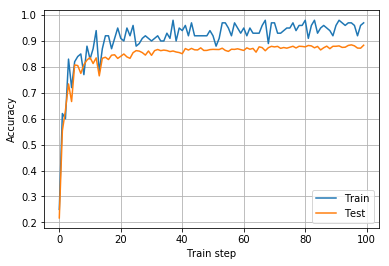

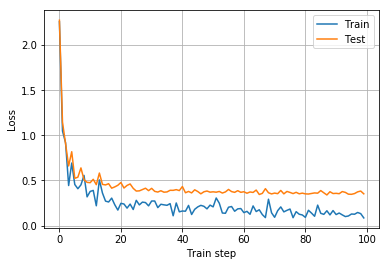

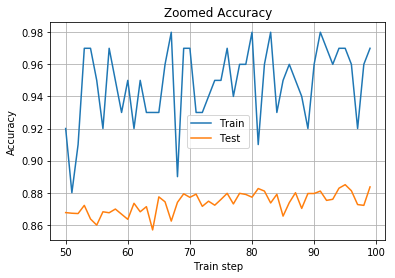

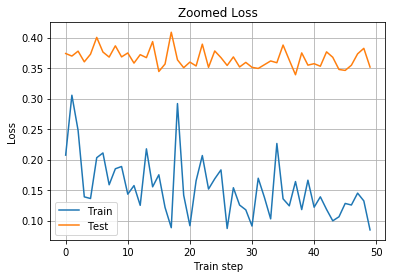

finish


In [6]:
#Max accuracy
maxacc_train = max(train_a)
maxacc_test = max(test_a)

print("Max accuracy [train] is : "+str(maxacc_train))
print("Max accuracy [test] is : "+str(maxacc_test))



# accuracy training vs testing dataset
plt.plot(train_a, label='Train')
plt.plot(test_a, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.grid(True)
plt.show()

# loss training vs testing dataset
plt.plot(train_c, label='Train')
plt.plot(test_c, label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter // validation_step)
plt.plot(x_range, train_a[zoom_point:], label='Train')
plt.plot(x_range, test_a[zoom_point:], label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.title('Zoomed Accuracy')
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:], label='Train')
plt.plot(test_c[zoom_point:], label='Test')
plt.grid(True)
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.title('Zoomed Loss')
plt.show()


# Questions
## 1)
        Sigmoid:
            Max accuracy [train] is : 0.96
            Max accuracy [test] is : 0.8652
        Relu:
            Max accuracy [train] is : 0.98
            Max accuracy [test] is : 0.885